# Hypothesis mechanism checker

This notebook serves as a hypothesis checker to analyse previously generated spatio-temporal radial heatmaps in lieu of certain new ideas etc etc etc

In [3]:
import os
import numpy as np
import sys
sys.path.append('../')
import render
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = [10,6]

### Distribution of wild-type divisions around Scr<sup>KD</sup> apoptoses

Hypothesis #1 is that the generally diffuse low probabilities of wt division is indicative of a mechanical mechanism of competition. This means that the competition is not apparent on a single-cell level via measuring coincidences of divisions and apoptoses, rather the competition is driven by mechanical forces that operate over several cell diameters.

One way to measure this is to see if the P(div) around a Scr apop is above a background rate across different time scales.

##### Loading heatmaps 

In [4]:
canon_arrays = np.load('/home/nathan/data/results/radial_analysis_output/follow/arrays/scr_apop_wt_div_N_cell_N_event_P_event_800.800.10.npz')
control_arrays = np.load('/home/nathan/data/results/radial_analysis_output/follow/arrays/wt_control_wt_div_N_cell_N_event_P_event_800.800.10.npz')

Array key: 

    arr_0 = N_cells
    arr_1 = N_events
    arr_2 = P_events
    
Array dimensionality:

    y = radial dimension
    x = temporal dimension

In [5]:
for i in canon_arrays:
    print(i)

arr_0
arr_1
arr_2


In [6]:
canon_arrays['arr_2']

array([[0.00207791, 0.00224084, 0.00141168, 0.00132865, 0.00141313,
        0.00091527, 0.00105961, 0.00105217, 0.00113566, 0.00111346],
       [0.00197637, 0.00177525, 0.00163802, 0.0015011 , 0.00134412,
        0.0012967 , 0.00134064, 0.00128581, 0.00126718, 0.00118534],
       [0.00175041, 0.0017683 , 0.0017051 , 0.00156908, 0.00148989,
        0.00137225, 0.00140396, 0.00138051, 0.00134145, 0.00129904],
       [0.00191597, 0.00168858, 0.00178383, 0.00166355, 0.00152496,
        0.00138755, 0.00140474, 0.00143284, 0.00131253, 0.00133735],
       [0.00171874, 0.00172032, 0.001738  , 0.00161022, 0.00153505,
        0.00142475, 0.00142009, 0.00142066, 0.0013129 , 0.00129414],
       [0.00184081, 0.00184503, 0.00173159, 0.00167957, 0.00156042,
        0.00148146, 0.00145129, 0.00143947, 0.00136   , 0.00127561],
       [0.00186075, 0.00181038, 0.00169634, 0.00164578, 0.00154604,
        0.00146484, 0.00145331, 0.00143062, 0.0013681 , 0.00131944],
       [0.00185229, 0.00192518, 0.0017565

In [7]:
P_events = canon_arrays['arr_2']
P_events_c = control_arrays['arr_2']

How these plots are typically displayed

In [8]:
## set a few params in inout dict
#input_dict = {'input_2d_hist':P_events, 'input_type':'P_events', 'N': 1839, 'radius': 800, 't_range': 800, 'focal_cell':'Scr', 'focal_event':'apop', 'subject_cell':'wt', 'subject_event': 'div', 'include_apop_bin':True, 'SI':True}

In [9]:
input_dict = {'input_2d_hist':P_events}

Enter the scan radius800
Enter the scan time range800
Input the title of your plottest
Input the label for your colorbarcool
What is the focal event of the radial scan?ok


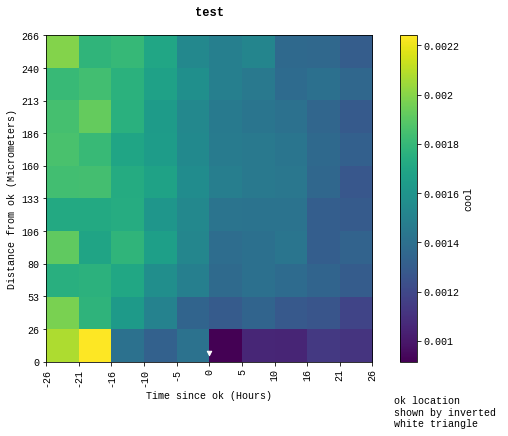

In [10]:
render.auto_plot_cumulative(input_dict)

try working with classes?

In [14]:
class plot:
    num_bins: int = 10
    radius: int = 800
    t_range: int = 800
    N: int = 1839
    focal_cell: str = 'Scr'
    focal_event: str = 'apop'
    subject_cell: str = 'wt'
    subject_event: str = 'div'
    include_apop_bin: bool = True
    SI: bool = True
    

In [15]:
plot.num_bins

10

In [36]:
class Plot:
    def __init__(self, num_bins, radius, t_range, SI: bool = True):
        self.num_bins = num_bins
        self.radius = radius
        self.t_range = t_range
        self.SI = SI
        ### is there a way to have optional inpout to this
        
    def kymo_labels(self, label_freq):
        # label_freq = 1
        radial_bin = self.radius / self.num_bins
        temporal_bin = self.t_range / self.num_bins

        if self.SI == True:
            time_scale_factor = 4 / 60  ## each frame is 4 minutes
            distance_scale_factor = 1 / 3  ## each pixel is 0.3recur micrometers
        else:
            time_scale_factor, distance_scale_factor = 1, 1

        ### generate labels for axis micrometers/hours
        xlocs = np.arange(
            -0.5, self.num_bins, label_freq
        )  ## -0.5 to start at far left border of first bin
        xlabels = []
        for m in np.arange(int(-self.num_bins / 2), int(self.num_bins / 2) + 1, label_freq):
            xlabels.append(
                str(int(((temporal_bin) * m) * time_scale_factor))
            )  # + "," + str(int(((temporal_bin)*m+temporal_bin)*time_scale_factor)))

        ylocs = np.arange(
            -0.5, self.num_bins, label_freq
        )  ## -0.5 to start at far top border of first bin
        ylabels = []
        for m in np.arange(self.num_bins, 0 - 1, -label_freq):
            ylabels.append(
                str(int(((radial_bin) * m) * distance_scale_factor))
            )  # + "," + str(int(((radial_bin)*(m-1)*distance_scale_factor))))

        return xlocs, xlabels, ylocs, ylabels

In [37]:
plot1 = Plot(40, 800, 800, True)

In [41]:
plot1.kymo_labels(label_freq = 2)

(array([-0.5,  1.5,  3.5,  5.5,  7.5,  9.5, 11.5, 13.5, 15.5, 17.5, 19.5,
        21.5, 23.5, 25.5, 27.5, 29.5, 31.5, 33.5, 35.5, 37.5, 39.5]),
 ['-26',
  '-24',
  '-21',
  '-18',
  '-16',
  '-13',
  '-10',
  '-8',
  '-5',
  '-2',
  '0',
  '2',
  '5',
  '8',
  '10',
  '13',
  '16',
  '18',
  '21',
  '24',
  '26'],
 array([-0.5,  1.5,  3.5,  5.5,  7.5,  9.5, 11.5, 13.5, 15.5, 17.5, 19.5,
        21.5, 23.5, 25.5, 27.5, 29.5, 31.5, 33.5, 35.5, 37.5, 39.5]),
 ['266',
  '253',
  '240',
  '226',
  '213',
  '200',
  '186',
  '173',
  '160',
  '146',
  '133',
  '120',
  '106',
  '93',
  '80',
  '66',
  '53',
  '40',
  '26',
  '13',
  '0'])

In [11]:
from dataclasses import dataclass 

In [19]:
@dataclass
class heatmap:
    array: np.ndarray
    num_bins: int #= heatmap.array.shape[0]
    radius: int
    t_range: int
        
    #assert heatmap.array.shape[0] == heatmap.array.shape[1], "Wrong shaped array" 

In [21]:
heatmap.array = np.ones((10,10))

In [22]:
heatmap.array 

array([[1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.]])

In [17]:
heatmap.num_bins = heatmap.array.shape[0]

In [18]:
heatmap.num_bins

10

In [23]:
heatmap.radius = 100

In [25]:
heatmap.t_range

AttributeError: type object 'heatmap' has no attribute 't_range'

In [203]:
class Heatmap:
    def __init__(self, array, radius, t_range, 
                 **scan_details):
                 
        self.array = array
        ### is the below debugging line strictly necessary?
        #assert isinstance(self.array, np.ndarray), 'Input heatmap not ndarray'
        
        self.radius = radius
        self.t_range = t_range
        
        self.num_bins = array.shape[0]
        
        self.scan_details = scan_details
        
    def xy_labels(self, label_freq: int = 1, SI:bool = True):
        radial_bin = self.radius / self.num_bins
        temporal_bin = self.t_range / self.num_bins

        if SI == True:
            time_scale_factor = 4 / 60  ## each frame is 4 minutes
            distance_scale_factor = 1 / 3  ## each pixel is 0.3recur micrometers
        else:
            time_scale_factor, distance_scale_factor = 1, 1

        ### generate labels for axis micrometers/hours
        xlocs = np.arange(
            -0.5, self.num_bins, label_freq
        )  ## -0.5 to start at far left border of first bin
        xlabels = []
        for m in np.arange(int(-self.num_bins / 2), int(self.num_bins / 2) + 1, label_freq):
            xlabels.append(
                str(int(((temporal_bin) * m) * time_scale_factor))
            )  # + "," + str(int(((temporal_bin)*m+temporal_bin)*time_scale_factor)))

        ylocs = np.arange(
            -0.5, self.num_bins, label_freq
        )  ## -0.5 to start at far top border of first bin
        ylabels = []
        for m in np.arange(self.num_bins, 0 - 1, -label_freq):
            ylabels.append(
                str(int(((radial_bin) * m) * distance_scale_factor))
            )  # + "," + str(int(((radial_bin)*(m-1)*distance_scale_factor))))

        return xlocs, xlabels, ylocs, ylabels
    
    def plot_titles(self, SI: bool = True):
        if 'input_type' not in self.scan_details:
            title = input('Input the title of your plot')
            cb_label = input('Input the label for your colorbar')
            focal_event_name = self.scan_details.get('focal_event', input('What is the focal event of the radial scan?'))
            x_axis_label = f"Time since {focal_event_name} "
            y_axis_label = f"Distance from {focal_event_name} "
        #else get focal cell etc details or ask for them if not present
        else:
            focal_cell_name = self.scan_details.get('focal_cell', input('What is the focal cell of the radial scan?'))
            focal_event_name = self.scan_details.get('focal_event', input('What is the focal event of the radial scan?'))
            subject_cell_name = self.scan_details.get('subject_cell', input('What is the subject cell of the radial scan?'))
            subject_event_name = self.scan_details.get('subject_event', input('What is the subject event of the radial scan?'))
            N = int(input_dict.get('N', input('Enter the number of focal events')))
            # now check which input type is specified
            if self.scan_details.get('input_type') == "N_cells":
                title = f"Spatiotemporal dist. of {subject_cell_name} cells \n around {focal_cell_name} {focal_event_name} (N={N})"
                cb_label = f"Number of {subject_cell_name} cell apperances"

            elif self.scan_details.get('input_type') == "N_events":
                title = f"Spatiotemporal dist. of {subject_cell_name} {subject_event_name} \n around {focal_cell_name} {focal_event_name} (N={N})"
                cb_label = f"Number of {subject_cell_name} {subject_event_name}"

            elif self.scan_details.get('input_type') == "P_events":
                title = f"Spatiotemporal dist. of probability of {subject_cell_name} {subject_event_name} \n around {focal_cell_name} {focal_event_name} (N={N})"
                cb_label = f"Probability of {subject_cell_name} {subject_event_name}"

            elif self.scan_details.get('input_type') == "CV":
                title = f"Coefficient of variation of probability of {subject_cell_name} {subject_event_name} \n around {focal_cell_name} {focal_event_name} (N={N})"
                cb_label = "Coefficient of variation"

            elif self.scan_details.get('input_type') == "stat_rel":
                title = f"Statisticall relevant areas of probability of {subject_cell_name} {subject_event_name} \n around {focal_cell_name} {focal_event_name} (N={N})"
                cb_label = "Relevant areas are set equal to 1"

            elif self.scan_details.get('input_type') == "dP":
                title = f"Difference in probability between \ncanonical and control analysis \ni.e. probability of {subject_event_name} above background"
                cb_label = "Difference in probability\n above background"
            else:
                print('input_type not recognised')
        if SI == True:
            time_unit = "(Hours)"
            distance_unit = "(Micrometers)"
        else:
            time_unit = "(Frames)"
            distance_unit = "(Pixels)"
            
        x_axis_label = f"Time since {focal_event_name} {time_unit}"
        y_axis_label = f"Distance from {focal_event_name} {distance_unit}"
        
        return title, cb_label, x_axis_label, y_axis_label

In [204]:
heatmap1 = Heatmap(np.ones((10,10)), 800, 800)
heatmap2 = Heatmap(np.zeros((10,10)), 400, 400)

In [205]:
heatmap1.scan_details

{}

In [211]:
heatmap1.scan_details = {'focal_cell':'scr', 'focal_event':'apop', 'input_type': 'N_cells'}

In [208]:
heatmap1.scan_details['focal_cell']

'scr'

In [209]:
heatmap1.xy_labels(label_freq=1, SI = False)

(array([-0.5,  0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5]),
 ['-400',
  '-320',
  '-240',
  '-160',
  '-80',
  '0',
  '80',
  '160',
  '240',
  '320',
  '400'],
 array([-0.5,  0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5]),
 ['800', '720', '640', '560', '480', '400', '320', '240', '160', '80', '0'])

In [213]:
heatmap1.plot_titles() 

What is the focal cell of the radial scan?a
What is the focal event of the radial scan? s
What is the subject cell of the radial scan?c
What is the subject event of the radial scan?d
Enter the number of focal events10


('Spatiotemporal dist. of c cells \n around scr apop (N=10)',
 'Number of c cell apperances',
 'Time since apop (Hours)',
 'Distance from apop (Micrometers)')

what is going on here ^^^

In [ ]:
render.auto_plot_cumulative(input_dict)

In [ ]:
P_events[:, 1]
# this radial column is of interest

#### Plotting radial columns

In [ ]:
for n, i in enumerate(P_events.transpose()):
    plt.plot(i, label = f'Temporal bin {n}')
plt.legend(loc = 'upper right', fontsize = 'xx-small')
plt.xlabel('Increasing radial bins')
plt.ylabel('Probability')
plt.title('Spatial distribution of probability of wild-type \n division around $Scr^{KD}$ apoptoses')

In [ ]:
for n, i in enumerate(P_events_c.transpose()):
    plt.plot(i, label = f'Temporal bin {n}')
plt.legend(loc = 'upper right', fontsize = 'xx-small')
plt.xlabel('Increasing radial bins')
plt.ylabel('Probability')
plt.title('Spatial distribution of probability of wild-type \n division around random wild-type points')
plt.show()

#### Plotting temporal rows

Just to confirm

In [ ]:
for n, i in enumerate(P_events):
    plt.plot(i, label = f'Temporal bin {n}')
plt.legend(loc = 'upper right', fontsize = 'xx-small')
plt.xlabel('Increasing radial bins')
plt.ylabel('Probability')
plt.title('Spatial distribution of probability of wild-type \n division around $Scr^{KD}$ apoptoses')
plt.show()

### Difference between radial columns canon and background control

In [ ]:
radius = 800
num_bins = 10

In [ ]:
plt.clf()
for i in range(len(P_events)):
    plt.plot(P_events[:,i] - P_events_c[:,i], label = f'Temporal bin {i}')
plt.legend(loc = 'upper right', fontsize = 'xx-small')
plt.xticks(ticks = range(-1, num_bins), labels = np.linspace(0, radius, num_bins +1, dtype = 'uint'), rotation = 'vertical')
plt.xlabel('Radial distance from apoptoses')
plt.ylabel('Probability')
plt.hlines(y = 0, xmin = 0, xmax= 10, color = 'black')
plt.title('Spatial distribution of probability of wild-type \n division around $Scr^{KD}$ apoptoses above background')
plt.show()

# Conclusion 

This seems to suggest that the overall rate of division is generally below background levels for each timepoint before and after the apoptosis event

If it were above background levels you could posit that there is an increased chance of division across all spatial bins and that this is evidence for mechanical competition at play via division events. However this is not the case, fuelling my suspicion that division events aren't driving the competition, they are merely a side effect of the competition.

Should I change the radial analysis to measure other events beside division?

# Measuring radial distribution of cell density (N_cells/area)

In [ ]:
N_cells = canon_arrays['arr_0']

In [ ]:
N_cells

Need a 10x10 array where each row is the area of that spatial bin (first in pixels)

In [ ]:
def bin_area(bin_num):
    import math
    bin_size = 80
    area = (math.pi * ((bin_num*bin_size)**2)) - (math.pi * ((bin_num-1)*bin_size)**2)
    return area

In [ ]:
bin_area(3)

In [ ]:
area_array = np.zeros((num_bins,num_bins))
for i in range(len(area_array)):
               area_array[i,:] = bin_area(i+1)
area_array

In [ ]:
dens_cells = N_cells/area_array

In [ ]:
%matplotlib inline
plt.rcParams['figure.figsize'] = [10,6]
plt.clf()
plt.imshow(np.flipud(dens_cells))
plt.colorbar()

plt.show()

In [ ]:
### set new params
input_dict_dens = {'input_2d_hist': dens_cells, 
                   'input_type': 'D_cells', 
                   'N':1839,
                   'radius': radius, 't_range': t_range, 
                   'focal_cell':'Scr', 'focal_event':'apop', 
                   'subject_cell':'wt', 'subject_event': 'density', 
                   'include_apop_bin':True, 'SI':True
                   }

In [ ]:
render.auto_plot_cumulative(input_dict_dens)

In [ ]:
plt.plot(dens_cells[1,:])
plt.show()

# Control example

In [ ]:
N_cells_c = control_arrays['arr_0']

In [ ]:
dens_cells_c = N_cells_c/area_array

In [ ]:
%matplotlib inline
plt.rcParams['figure.figsize'] = [10,6]
plt.clf()
plt.imshow(np.flipud(dens_cells_c))
plt.colorbar()

plt.show()

### Conc: looks like the increase in "density" seems to be a result of the scan becoming stationary post apoptosis, but why? It's because of the track lengths, ie there are fewer tracks that extend back that far

# Need to do (N_cells/N_apops)/bin_area

# Occupancy plot needed ie. number of focal apops that feature in that spatiotemporal bin

# Checking out other ranges

In [ ]:
radius, t_range, num_bins = 400, 400, 10


# Changing autoplot function to be more versatile

make into a class a la DaskOctopusLiteLoader?

In [ ]:
from dataclasses import dataclass

In [ ]:
@dataclass
class input_dict_2:
    include_apop_bin: bool = True
    array: tuple = (0,1)
    
    @property
    def afunction(self):
        return self

In [ ]:
input_dict

In [ ]:
input_dict2 = {'array':[0,1,2], 'include_apop_bin': 'test'}

In [ ]:
include_apop_bin = input_dict2.get('test')

In [ ]:
## label unit formatting
if input_dict2.get('SI') == True or input_dict2.get('SI') == None:
    time_unit = "(Hours)"
    distance_unit = "(Micrometers)"
else:
    time_unit = "(Frames)"
    distance_unit = "(Pixels)" 

In [ ]:
distance_unit

In [ ]:
label_freq = 4 if num_bins > 20 else 1

In [ ]:
input_dict = {'test':'cool'}

In [ ]:
input_dict.get('input_2d_hist', print(('No heatmap input found')))

In [ ]:
def do_something_dangerous(self):
    raise Exception("Boo!")
    print('fail')

In [ ]:
def auto_plot_cumulative(
input_dict
):
    plt.clf()
    ### read input parameters and data
    input_2d_hist = input_dict.get('input_2d_hist', print('No heatmap input found'))
    N = input_dict.get('N', input('Enter the number of focal events'))
    radius = input_dict.get('radius', input('Enter the scan radius'))             
    t_range = input_dict.get('t_range', input('Enter the scan time range')  
    
    ### default to have standard measures
    SI = input_dict.get('SI', True)
   
    ### default to read the number of bins from the array shape
    num_bins = input_dict.get('num_bins', input_2d_hist.shape[0])
    ### default is to have no cbar_lim
    cbar_lim = input_dict.get('cbar_lim', False)
   
    ### set the label frequency according to the num bins
    label_freq = 4 if num_bins > 20 else 1
    
    # get correctly spaced labels
    xlocs, xlabels, ylocs, ylabels = kymo_labels(
        num_bins, label_freq, radius, t_range, SI
    )
    
    # get scan details
    focal_cell_name = input_dict.get('focal_cell', input('What is the focal cell of the radial scan?'))
    focal_event_name = input_dict.get('focal_event', input('What is the focal event of the radial scan?'))
    subject_cell_name = input_dict.get('subject_cell', input('What is the subject cell of the radial scan?'))
    subject_event_name = input_dict.get('subject_event', input('What is the subject event of the radial scan?'))
    
    # title formatting, if input type unrecognised or not entered then manual entry prompted
    if input_dict.get('input_type') == "N_cells":
        title = f"Spatiotemporal dist. of {subj_cell_name} cells \n around {focal_cell_name} {focal_event_name} (N={N})"
        cb_label = f"Number of {subj_cell_name} cell apperances"
        
    elif input_dict.get('input_type') == "N_events":
        title = f"Spatiotemporal dist. of {subj_cell_name} {subj_event_name} \n around {focal_cell_name} {focal_event_name} (N={N})"
        cb_label = f"Number of {subj_cell_name} {subj_event_name}"
        
    elif input_dict.get('input_type') == "P_events":
        title = f"Spatiotemporal dist. of probability of {subj_cell_name} {subj_event_name} \n around {focal_cell_name} {focal_event_name} (N={N})"
        cb_label = f"Probability of {subj_cell_name} {subj_event_name}"
        
    elif input_dict.get('input_type') == "CV":
        title = f"Coefficient of variation of probability of {subj_cell_name} {subj_event_name} \n around {focal_cell_name} {focal_event_name} (N={N})"
        cb_label = "Coefficient of variation"
        
    elif input_dict.get('input_type') == "stat_rel":
        title = f"Statisticall relevant areas of probability of {subj_cell_name} {subj_event_name} \n around {focal_cell_name} {focal_event_name} (N={N})"
        cb_label = "Relevant areas are set equal to 1"
        
    elif input_dict.get('input_type') == "dP":
        title = f"Difference in probability between \ncanonical and control analysis \ni.e. probability of {subject_event_name} above background"
        cb_label = "Difference in probability\n above background"
    else: 
        title = input('Input the title of your plot')
        cb_label = input('Input the label for your colorbar')
        
    ## label unit formatting
    if SI == True:
        time_unit = "(Hours)"
        distance_unit = "(Micrometers)"
    else:
        time_unit = "(Frames)"
        distance_unit = "(Pixels)"

    ## plotting
    font = {"fontname": "Liberation Mono"}
    plt.xticks(xlocs, xlabels, rotation="vertical", **font)
    plt.yticks(ylocs, ylabels, **font)
    plt.xlabel("Time since apoptosis " + time_unit, **font)
    plt.ylabel("Distance from apoptosis " + distance_unit, **font)
    plt.title(title + "\n", fontweight="bold", **font)
    
    ### default is to include the apoptotic spatial bin
    include_apop_bin = input_dict.get('include_apop_bin', True)
    ## if include_apop_bin is true then the spatial bin containing the apoptotic cell (ie the central spatial bin of the radial scan) will be show in the graph, if false then it is cropped which ends up with a plot showing only the relevant local env not the site of apop (better imo)
    if include_apop_bin == True:
        final_hist = np.flipud(input_2d_hist)  ## flip for desired graph orientation
    else:
        final_hist = np.flipud(input_2d_hist[1:-1, :])

    ## apop location marker
    if num_bins == 10:
        if include_apop_bin == True:
            plt.scatter(
                num_bins / 2 - 0.5, num_bins - 0.75, s=20, c="white", marker="v"
            )
            plt.text(
                num_bins + 0.15,
                num_bins + 1.5,
                "Apoptosis location \nshown by inverted \nwhite triangle",
                **font,
            )
        else:
            plt.scatter(
                num_bins / 2 - 0.5, num_bins - 2 - 0.75, s=20, c="white", marker="v"
            )
            plt.text(
                num_bins + 0.15,
                num_bins + 1.5 - 2,
                "Apoptosis location \nshown by inverted \nwhite triangle",
                **font,
            )
    if num_bins == 20:
        if include_apop_bin == True:
            plt.scatter(num_bins / 2 - 0.5, num_bins - 0.9, s=20, c="white", marker="v")
            plt.text(
                num_bins + 0.3,
                num_bins + 3.5,
                "Apoptosis location \nshown by inverted \nwhite triangle",
                **font,
            )
        else:
            plt.scatter(num_bins / 2 - 0.5, num_bins - 1.8, s=20, c="white", marker="v")
            plt.text(
                num_bins + 0.3,
                num_bins + 2.5,
                "Apoptosis location \nshown by inverted \nwhite triangle",
                **font,
            )
    
    ### default is to have no cbar_lim
    cbar_lim = input_dict.get('cbar_lim', False)
    ## colorbar
    if cbar_lim == False:
        if include_apop_bin == False:
            plt.clim(
                vmin=np.min(input_2d_hist[1:-1, :]), vmax=np.max(input_2d_hist[1:-1, :])
            )
        else:
            plt.clim(vmin=np.min(input_2d_hist), vmax=np.max(input_2d_hist))
        cb = plt.colorbar(
            label=cb_label
        )  ### matplotlib.cm.ScalarMappable(norm = ???cmap='PiYG'), use this in conjunction with norm to set cbar equal to diff piyg coloourscheme
        ax = cb.ax
        text = ax.yaxis.label
        font = matplotlib.font_manager.FontProperties(family="Liberation Mono")
        text.set_font_properties(font)
        ax.set_yticklabels(
            np.round(ax.get_yticks(), 5), **{"fontname": "Liberation Mono"}
        )  ### cropped to 5dp
    else:
        cbar_lim = input_dict['cbar_lim']
        plt.clim(vmin=cbar_lim[0], vmax=cbar_lim[1])
        cb = plt.colorbar(label=cb_label)
        ax = cb.ax
        text = ax.yaxis.label
        font = matplotlib.font_manager.FontProperties(family="Liberation Mono")
        text.set_font_properties(font)
        ax.set_yticklabels(
            np.round(ax.get_yticks(), 5), **{"fontname": "Liberation Mono"}
        )

    ### default to have no bin labels
    bin_labels = input_dict.get('bin_labels', False)
    ## bin labels
    if bin_labels == True:
        flipped = np.flipud(input_2d_hist)
        if input_type == "P_events":
            for i in range(len(input_2d_hist)):
                for j in range(len(input_2d_hist)):
                    text = plt.text(
                        j,
                        i,
                        round(flipped[i, j], 5),
                        ha="center",
                        va="center",
                        color="w",
                        fontsize="xx-small",
                    )
        elif input_type == "dP":
            for i in range(len(input_2d_hist)):
                for j in range(len(input_2d_hist)):
                    text = plt.text(
                        j,
                        i,
                        round(flipped[i, j], 6),
                        ha="center",
                        va="center",
                        color="w",
                        fontsize="xx-small",
                    )
        elif input_type == "CV":
            for i in range(len(input_2d_hist)):
                for j in range(len(input_2d_hist)):
                    text = plt.text(
                        j,
                        i,
                        round(flipped[i, j], 3),
                        ha="center",
                        va="center",
                        color="w",
                        fontsize="xx-small",
                    )
        if input_type == "stat_rel":
            for i in range(len(input_2d_hist)):
                for j in range(len(input_2d_hist)):
                    text = plt.text(
                        j,
                        i,
                        int(flipped[i, j]),
                        ha="center",
                        va="center",
                        color="w",
                        fontsize="xx-small",
                    )
        else:
            for i in range(len(input_2d_hist)):
                for j in range(len(input_2d_hist)):
                    text = plt.text(
                        j,
                        i,
                        int(flipped[i, j]),
                        ha="center",
                        va="center",
                        color="w",
                        fontsize="xx-small",
                    )
    ## save out?
    if 'save_parent_dir' not in input_dict:
        plt.imshow(final_hist)
        return   # ,cmap = 'PiYG')
    else:
        ## output save path formatting
        save_parent_dir = input_dict['save_parent_dir']
        save_dir_name = "{}_{}_{}_{}".format(
            focal_cell.lower(),
            focal_event.lower()[0:3]
            if focal_event == "DIVISION"
            else focal_event.lower()[0:4],
            subject_cell.lower(),
            subject_event.lower()[0:3]
            if subject_event == "DIVISION"
            else subject_event.lower()[0:4],
        )
        save_path = os.path.join(save_parent_dir, save_dir_name)
        # if (
        #     not input_type == "dP"
        # ):  ### combined type does not require segregated folders for canon control
        Path(save_path).mkdir(parents=True, exist_ok=True)

        ## filename
        fn = save_path + "/" + title + f" {radius}.{t_range}.{num_bins}.pdf"
        ## failsafe overwriting block
        if os.path.exists(fn):
            print("Filename", fn, "already exists, saving as updated copy")
            fn = fn.replace(
                ".pdf", " (updated {}).pdf".format(time.strftime("%Y%m%d-%H%M%S"))
            )
        plt.imshow(final_hist)
        plt.plot()
        plt.savefig(fn, dpi=300, bbox_inches="tight")
        print("Plot saved at ", fn)

        return plt.imshow(final_hist)

In [ ]:
def auto_plot_cumulative(
input_dict
):
    plt.clf()
    ### read input parameters and data
    input_2d_hist = input_dict['input_2d_hist']
    input_type = input_dict['input_type']         # make this string input
    N = input_dict['N']
    radius = input_dict['radius']                 # can i make this read from preexisting        
    t_range = input_dict['t_range']               # ditto
    focal_cell = input_dict['focal_cell']         # make string input that just prints?
    focal_event = input_dict['focal_event']    
    subject_cell = input_dict['subject_cell']
    subject_event = input_dict['subject_event']

    ### set the default params if param entry in dict is empty
    ### default is to include the apoptotic spatial bin
    if 'include_apop_bin' not in input_dict:
        include_apop_bin = True
    else:
        include_apop_bin = input_dict['include_apop_bin']
    ### default to have standard measures
    if 'SI' not in input_dict:
        SI = True
    else:
        SI = input_dict['SI']
    ### default to have no bin labels
    if 'bin_labels' not in input_dict:
        bin_labels = False
    else:
        bin_labels = input_dict['bin_labels']
    ### default to read the number of bins from the array shape
    if 'num_bins' not in input_dict:
        num_bins = input_2d_hist.shape[0]
    else:
        num_bins = input_dict['num_bins']
    ### default is to have no cbar_lim
    if 'cbar_lim' not in input_dict:
        cbar_lim = False
    else:
        cbar_lim = input_dict['cbar_lim']

    ### set the label frequency according to the num bins
    if num_bins > 20:
        label_freq = 4
    else:
        label_freq = 1
    xlocs, xlabels, ylocs, ylabels = kymo_labels(
        num_bins, label_freq, radius, t_range, SI
    )

    ## formatting cell and event names
    focal_event_name = (
        "apoptoses" if "apop" in focal_event.lower() else "divisions"
    )  # focal_event == 'APOPTOSIS' or 'apop' else 'divisions'
    focal_cell_name = "wild-type" if "wt" in focal_cell.lower() else "Scribble"
    subj_event_name = "apoptoses" if "apop" in subject_event.lower() else "divisions"
    subj_cell_name = "wild-type" if "wt" in subject_cell.lower() else "Scribble"

    if focal_event == "control":
        focal_event_name = "random time points"

    title = (
        "Spatiotemporal dist. of probability of {} {} \n around {} {} (N={})".format(
            subj_cell_name, subj_event_name, focal_cell_name, focal_event_name, N
        )
    )

    ## title formatting
    if input_type == "N_cells":
        title = "Spatiotemporal dist. of {} cells \n around {} {} (N={})".format(
            subj_cell_name, focal_cell_name, focal_event_name, N
        )
        cb_label = f"Number of {subj_cell_name} cell apperances"
    if input_type == "N_events":
        title = "Spatiotemporal dist. of {} {} \n around {} {} (N={})".format(
            subj_cell_name, subj_event_name, focal_cell_name, focal_event_name, N
        )
        cb_label = f"Number of {subj_cell_name} {subj_event_name}"
    if input_type == "P_events":
        title = "Spatiotemporal dist. of probability of {} {} \n around {} {} (N={})".format(
            subj_cell_name, subj_event_name, focal_cell_name, focal_event_name, N
        )
        cb_label = f"Probability of {subj_cell_name} {subj_event_name}"
    if input_type == "CV":
        title = "Coefficient of variation of probability of {} {} \n around {} {} (N={})".format(
            subj_cell_name, subj_event_name, focal_cell_name, focal_event_name, N
        )
        cb_label = "Coefficient of variation"
    if input_type == "stat_rel":
        title = "Statisticall relevant areas of probability of {} {} \n around {} {} (N={})".format(
            subj_cell_name, subj_event_name, focal_cell_name, focal_event_name, N
        )
        cb_label = "Relevant areas are set equal to 1"
    if input_type == "dP":
        title = "Difference in probability between \ncanonical and control analysis \ni.e. probability of division above background".format(
            subj_cell_name, subj_event_name, focal_cell_name, focal_event_name, N
        )
        cb_label = "Difference in probability\n above background"

    ## label unit formatting
    if SI == True:
        time_unit = "(Hours)"
        distance_unit = "(Micrometers)"
    else:
        time_unit = "(Frames)"
        distance_unit = "(Pixels)"

    ## plotting
    font = {"fontname": "Liberation Mono"}
    plt.xticks(xlocs, xlabels, rotation="vertical", **font)
    plt.yticks(ylocs, ylabels, **font)
    plt.xlabel("Time since apoptosis " + time_unit, **font)
    plt.ylabel("Distance from apoptosis " + distance_unit, **font)
    plt.title(title + "\n", fontweight="bold", **font)

    ## if include_apop_bin is true then the spatial bin containing the apoptotic cell (ie the central spatial bin of the radial scan) will be show in the graph, if false then it is cropped which ends up with a plot showing only the relevant local env not the site of apop (better imo)
    if include_apop_bin == True:
        final_hist = np.flipud(input_2d_hist)  ## flip for desired graph orientation
    else:
        final_hist = np.flipud(input_2d_hist[1:-1, :])

    ## apop location marker
    if num_bins == 10:
        if include_apop_bin == True:
            plt.scatter(
                num_bins / 2 - 0.5, num_bins - 0.75, s=20, c="white", marker="v"
            )
            plt.text(
                num_bins + 0.15,
                num_bins + 1.5,
                "Apoptosis location \nshown by inverted \nwhite triangle",
                **font,
            )
        else:
            plt.scatter(
                num_bins / 2 - 0.5, num_bins - 2 - 0.75, s=20, c="white", marker="v"
            )
            plt.text(
                num_bins + 0.15,
                num_bins + 1.5 - 2,
                "Apoptosis location \nshown by inverted \nwhite triangle",
                **font,
            )
    if num_bins == 20:
        if include_apop_bin == True:
            plt.scatter(num_bins / 2 - 0.5, num_bins - 0.9, s=20, c="white", marker="v")
            plt.text(
                num_bins + 0.3,
                num_bins + 3.5,
                "Apoptosis location \nshown by inverted \nwhite triangle",
                **font,
            )
        else:
            plt.scatter(num_bins / 2 - 0.5, num_bins - 1.8, s=20, c="white", marker="v")
            plt.text(
                num_bins + 0.3,
                num_bins + 2.5,
                "Apoptosis location \nshown by inverted \nwhite triangle",
                **font,
            )

    ## colorbar
    if cbar_lim == False:
        if include_apop_bin == False:
            plt.clim(
                vmin=np.min(input_2d_hist[1:-1, :]), vmax=np.max(input_2d_hist[1:-1, :])
            )
        else:
            plt.clim(vmin=np.min(input_2d_hist), vmax=np.max(input_2d_hist))
        cb = plt.colorbar(
            label=cb_label
        )  ### matplotlib.cm.ScalarMappable(norm = ???cmap='PiYG'), use this in conjunction with norm to set cbar equal to diff piyg coloourscheme
        ax = cb.ax
        text = ax.yaxis.label
        font = matplotlib.font_manager.FontProperties(family="Liberation Mono")
        text.set_font_properties(font)
        ax.set_yticklabels(
            np.round(ax.get_yticks(), 5), **{"fontname": "Liberation Mono"}
        )  ### cropped to 5dp
    else:
        cbar_lim = input_dict['cbar_lim']
        plt.clim(vmin=cbar_lim[0], vmax=cbar_lim[1])
        cb = plt.colorbar(label=cb_label)
        ax = cb.ax
        text = ax.yaxis.label
        font = matplotlib.font_manager.FontProperties(family="Liberation Mono")
        text.set_font_properties(font)
        ax.set_yticklabels(
            np.round(ax.get_yticks(), 5), **{"fontname": "Liberation Mono"}
        )

    ## bin labels
    if bin_labels == True:
        flipped = np.flipud(input_2d_hist)
        if input_type == "P_events":
            for i in range(len(input_2d_hist)):
                for j in range(len(input_2d_hist)):
                    text = plt.text(
                        j,
                        i,
                        round(flipped[i, j], 5),
                        ha="center",
                        va="center",
                        color="w",
                        fontsize="xx-small",
                    )
        elif input_type == "dP":
            for i in range(len(input_2d_hist)):
                for j in range(len(input_2d_hist)):
                    text = plt.text(
                        j,
                        i,
                        round(flipped[i, j], 6),
                        ha="center",
                        va="center",
                        color="w",
                        fontsize="xx-small",
                    )
        elif input_type == "CV":
            for i in range(len(input_2d_hist)):
                for j in range(len(input_2d_hist)):
                    text = plt.text(
                        j,
                        i,
                        round(flipped[i, j], 3),
                        ha="center",
                        va="center",
                        color="w",
                        fontsize="xx-small",
                    )
        if input_type == "stat_rel":
            for i in range(len(input_2d_hist)):
                for j in range(len(input_2d_hist)):
                    text = plt.text(
                        j,
                        i,
                        int(flipped[i, j]),
                        ha="center",
                        va="center",
                        color="w",
                        fontsize="xx-small",
                    )
        else:
            for i in range(len(input_2d_hist)):
                for j in range(len(input_2d_hist)):
                    text = plt.text(
                        j,
                        i,
                        int(flipped[i, j]),
                        ha="center",
                        va="center",
                        color="w",
                        fontsize="xx-small",
                    )
    ## save out?
    if 'save_parent_dir' not in input_dict:
        plt.imshow(final_hist)
        return   # ,cmap = 'PiYG')
    else:
        ## output save path formatting
        save_parent_dir = input_dict['save_parent_dir']
        save_dir_name = "{}_{}_{}_{}".format(
            focal_cell.lower(),
            focal_event.lower()[0:3]
            if focal_event == "DIVISION"
            else focal_event.lower()[0:4],
            subject_cell.lower(),
            subject_event.lower()[0:3]
            if subject_event == "DIVISION"
            else subject_event.lower()[0:4],
        )
        save_path = os.path.join(save_parent_dir, save_dir_name)
        # if (
        #     not input_type == "dP"
        # ):  ### combined type does not require segregated folders for canon control
        Path(save_path).mkdir(parents=True, exist_ok=True)

        ## filename
        fn = save_path + "/" + title + f" {radius}.{t_range}.{num_bins}.pdf"
        ## failsafe overwriting block
        if os.path.exists(fn):
            print("Filename", fn, "already exists, saving as updated copy")
            fn = fn.replace(
                ".pdf", " (updated {}).pdf".format(time.strftime("%Y%m%d-%H%M%S"))
            )
        plt.imshow(final_hist)
        plt.plot()
        plt.savefig(fn, dpi=300, bbox_inches="tight")
        print("Plot saved at ", fn)

        return plt.imshow(final_hist)